<a href="https://colab.research.google.com/github/lovepreetmultani/python/blob/main/Logistic_Regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [63]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_Train.csv to Titanic_Train (3).csv


In [85]:
titanic= pd.read_csv('Titanic_Train.csv',error_bad_lines=False, sep = ';') # removing bad lines

In [86]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S


In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(5), object(7)
memory usage: 83.7+ KB


In [19]:
titanic.describe()

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [101]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [99]:
titanic.drop('Cabin', axis=1,inplace=True)

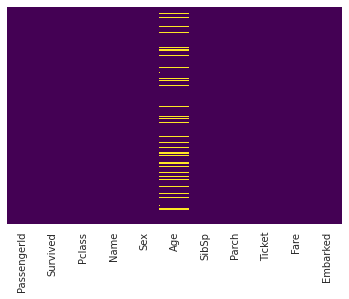

In [102]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [30]:
sns.set_style('whitegrid')

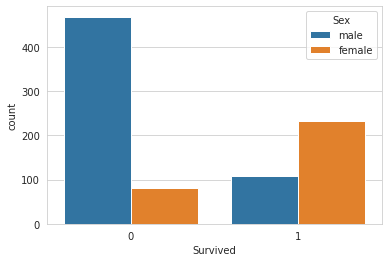

In [60]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

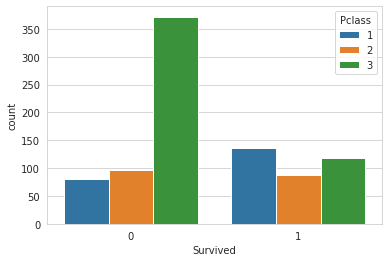

In [31]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

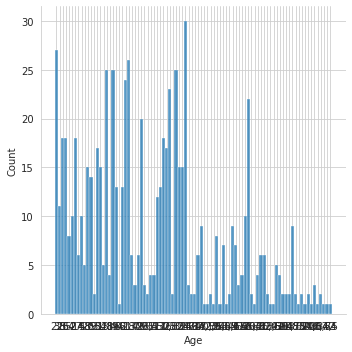

In [46]:
sns.displot(titanic['Age'].dropna(),kde=False, bins=30)

In [70]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(5), object(7)
memory usage: 83.7+ KB


In [72]:
titanic['Age'] = pd.to_numeric(titanic['Age'], errors='ignore')

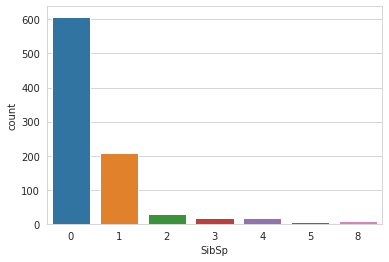

In [73]:
sns.countplot(x='SibSp', data=titanic)

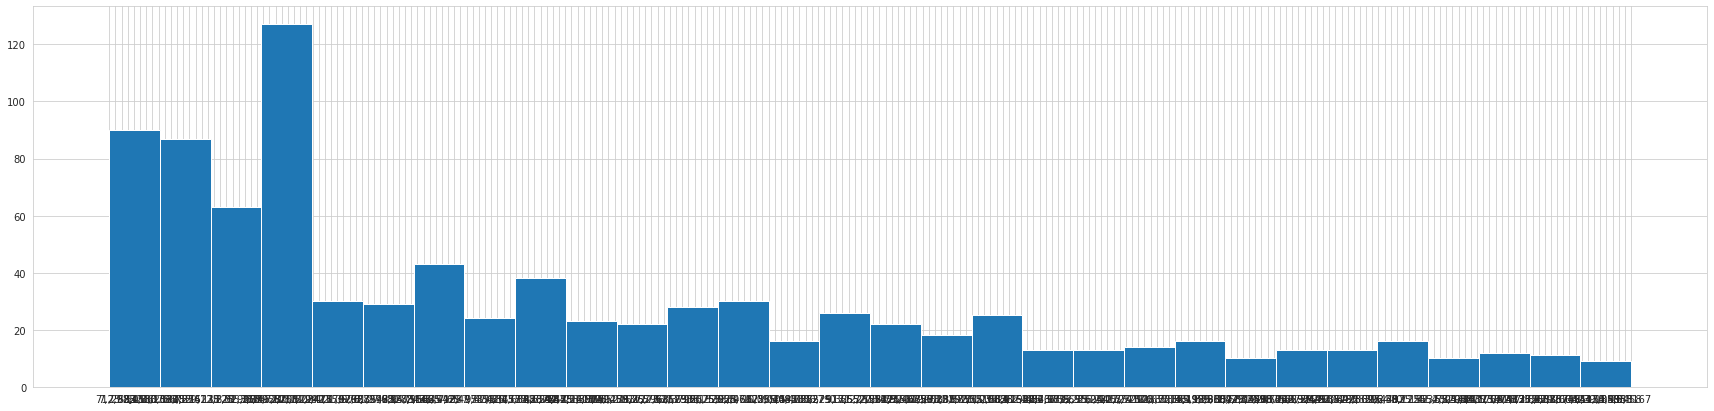

In [82]:
titanic['Fare'].hist(bins=30,figsize=(30,7))

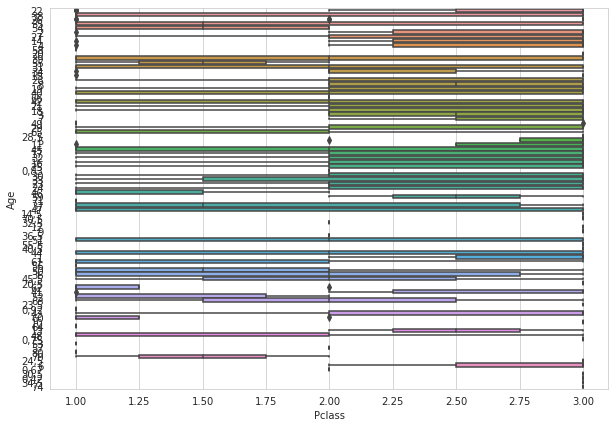

In [103]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [107]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)

In [108]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [109]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [110]:
titanic=pd.concat([titanic, sex, embark], axis=1 )

In [111]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",S,1,0,1


In [112]:
titanic.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [116]:
titanic.drop(['PassengerId'], axis=1, inplace=True)

In [117]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,"7,25",1,0,1
1,1,1,38,1,0,"71,2833",0,0,0
2,1,3,26,0,0,"7,925",0,0,1
3,1,1,35,1,0,"53,1",0,0,1
4,0,3,35,0,0,"8,05",1,0,1


In [119]:
X=titanic.drop('Survived', axis=1)
y=titanic['Survived']